In [137]:
#Ejercicio 2 Función coseno
#Como primer paso instalamos todas las librerías a utilizar tanto en éste ejercicio, como en el ejercicio 4.
Pkg.add("SymPy")
Pkg.add("PyPlot")
using PyPlot
plt = PyPlot;

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [84]:
#Se define la función a derivar.
function g(x)
    return cos(x)
end

g (generic function with 1 method)

In [85]:
#b corresponde al intervalo en donde está definido x.
b=linspace(0,1,10)

0.0:0.1111111111111111:1.0

In [86]:
collect(b)

10-element Array{Float64,1}:
 0.0     
 0.111111
 0.222222
 0.333333
 0.444444
 0.555556
 0.666667
 0.777778
 0.888889
 1.0     

In [87]:
b[3]

0.2222222222222222

In [88]:
#El siguiente programa calcula la derivada de la función coseno, éste recibe la función, i ( cuyo valor debe estar dentro de la longitud del intervalo b) y h.
function derivada_cos(g,i,h)
    x=b[i]  #x es el valor b[i] del intervalo.
    g=(g(x+h)-g(x))/h
        return g
    end

derivada_cos (generic function with 1 method)

In [89]:
derivada_cos(g,3,0.01)

-0.2252710799637625

In [90]:
#Se compara el resultado anterior, con el que indica el valor exacto. Nótese que ambos son muy cercanos.
derivada_exacta=-sin(0.2222222222222222)

-0.22039774345612226

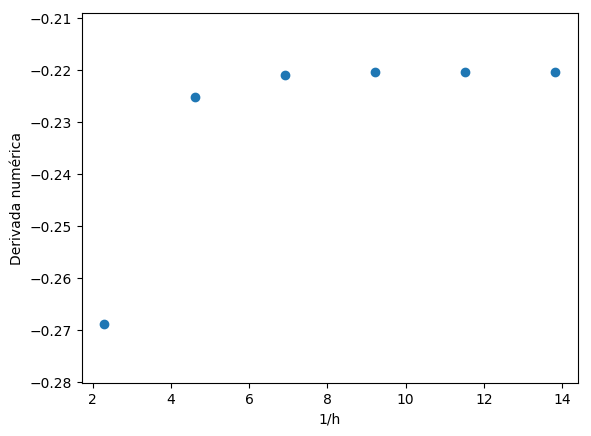

In [141]:
#Finalmente, se realiza el código para graficar el comportamiento de la derivada.
x = [0.0,0.1,0.01,0.001,0.0001,0.00001,0.000001]  #x corresponden al conjunto de valores que tomará h.
y=[]  #Definimos una lista vacía para poder ahí guardar los valores.
for h in x  #Se realiza un ciclo for para determinar los valores 1/h.
    push!(y,1/h)
end
F=[]
for i in x  #Nuevamente se realiza un ciclo for para los valores de la derivada numérica.
   push!(F,derivada_cos(g,3,i))
end
plt.scatter(log.(y),F) #Importante: se grafica en escala logarítmica para observar a detalle el comportamiento de la derivada, de no ser así, los puntos en la representación son confusos.
ylabel("Derivada numérica"); #Se asigna el nombre al eje "x" y al eje "y".
xlabel("1/h");


In [ ]:
#De la representación gráfica mostrada anteriormente se muestra que mientras h sea más pequeño, el valor de 1/h es grande, por lo que mientras h sea más pequeña la aproximación a la derivada numérica es mejor.

In [111]:
#Nuevamente se define el conjunto de valores para h, ahora para graficar el error relativo.
h=[0.0,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]

8-element Array{Float64,1}:
 0.0   
 0.1   
 0.01  
 0.001 
 0.0001
 1.0e-5
 1.0e-6
 1.0e-7

In [112]:
#Se establece la función del error relativo.
function error(g,x,h)
    ε=abs((((g(x+h)-g(x))/h)-derivada_exacta)/derivada_exacta)
    return ε
end

error (generic function with 1 method)

In [113]:
#ε corresponde a la lista del error relativo conforme varía h.
ε=error.(g,0.222222222222,h)

8-element Array{Float64,1}:
 NaN          
   0.219434   
   0.0221116  
   0.00221267 
   0.000221282
   2.21284e-5 
   2.21261e-6 
   2.21339e-7 

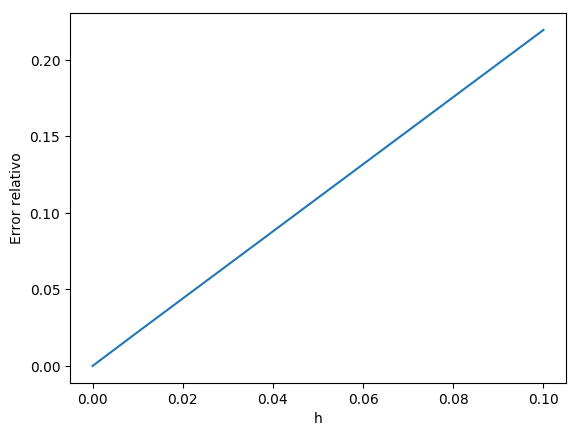

In [114]:
#Se construye la representación gráfica del error relativo vs h.
plot(h,ε)
ylabel("Error relativo");
xlabel("h");

In [ ]:
#De esta representación gráfica se aprecia que conforme h aumenta el error relativo aumenta en una relación lineal.

# Ejercicio 3

Este ejercicio nos presenta la siguiente interrogante: Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica?, y nos proporcionan el siguiente tip:  ¿Qué pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series?.

Entonces comencemos por desarrollar la expresión $f(x+h)$ en serie de Taylor: $$f(x+h)=f(x)+
h\frac{d}{d\xi}|_{\xi=x}f(\xi)+\frac{h^2}{2}\frac{d^2}{d\xi^2}|_{\xi=x}f(\xi)+\frac{h^3}{6}\frac{d^3}{d\xi^3}|_{\xi=x}f(\xi)+\vartheta(h^4)$$

Mientras que la expansión para $f(x-h)$ es:$$f(x-h)=f(x)-
h\frac{d}{d\xi}|_{\xi=x}f(\xi)+\frac{h^2}{2}\frac{d^2}{d\xi^2}|_{\xi=x}f(\xi)-\frac{h^3}{6}\frac{d^3}{d\xi^3}|_{\xi=x}f(\xi)+\vartheta(h^4)$$

Restando $f(x-h)$ a $f(x+h)$:

$$f(x+h)-f(x-h)=2h\frac{d}{d\xi}|_{\xi=x}f(\xi)+\frac{h^3}{3}\frac{d^3}{d\xi^3}|_{\xi=x}f(\xi)+\vartheta(h^5)$$

O bien: $$f(x+h)-f(x-h)=2h\frac{d}{d\xi}|_{\xi=x}f(\xi)+\vartheta(h^2)$$

Ahora será necesario usar algunas propiedades:


1)$f(x+h)-f(x-h)=\vartriangle f(x,h)$

2)$f'(x)=\frac{d}{d\xi}|_{\xi=x}$

Entonces, tenemos que:$$\vartriangle f(x,h)+\vartheta(h^2)=2hf'(x)$$
$$f'(x)+\vartheta(h^2)=\frac{\vartriangle f(x,h)}{2h}$$

Por lo tanto:$$\vartheta(h^2)=\frac{\vartriangle f(x,h)}{2h}-f'(x)$$

De este último resultado es posible concluir que la derivada numérica a primer orden tiene un error del orden 2 con respecto al valor de h. En general, el valor de la derivada numérica puede ser más exacto tomando h's muy pequeños.

In [121]:
#Ejercicio 4 derivada simétrica
#Se define la función derivada simétrica, los inputs son la función (definida en el ejercicio 2), x el valor en el que se desea evaluar ésta última y h.
function derivada_simetrica(g,x,h)
    dg=(g(x+h)-g(x-h))/2h
    return dg
end

derivada_simetrica (generic function with 1 method)

In [122]:
#h se establece ahora como un intervalo.
h=linspace(0.001,0.01,15)

0.001:0.0006428571428571428:0.01

In [123]:
collect(h)

15-element Array{Float64,1}:
 0.001     
 0.00164286
 0.00228571
 0.00292857
 0.00357143
 0.00421429
 0.00485714
 0.0055    
 0.00614286
 0.00678571
 0.00742857
 0.00807143
 0.00871429
 0.00935714
 0.01      

In [124]:
#Se imprimen todos los valores de la derivada simétrica conforme h varía en el intervalo.
listDS=derivada_simetrica.(g,0.2222222222222222,h)

15-element Array{Float64,1}:
 -0.220398
 -0.220398
 -0.220398
 -0.220397
 -0.220397
 -0.220397
 -0.220397
 -0.220397
 -0.220396
 -0.220396
 -0.220396
 -0.220395
 -0.220395
 -0.220395
 -0.220394

In [125]:
#Se define la función de la derivda exacta en cualquier punto x.
function derivada_exacta4(x)
    return dg=-sin(x)
end

derivada_exacta4 (generic function with 1 method)

In [126]:
derivada_exacta4(0.2222222222222222)

-0.22039774345612226

In [127]:
f(x)=1/x

f (generic function with 1 method)

In [128]:
#listf corresponde a la función 1/x evaluada en el intervalo h.
listf=f.(h)

15-element Array{Float64,1}:
 1000.0  
  608.696
  437.5  
  341.463
  280.0  
  237.288
  205.882
  181.818
  162.791
  147.368
  134.615
  123.894
  114.754
  106.87 
  100.0  

In [129]:
#Y es una lista del valor exacto de la derivada en 0.22222222, esto se realiza para apreciar la convergencia en la representación gráfica que se presenta a continuación.
Y=ones(length(listf)).*-sin(0.2222222222222222)

15-element Array{Float64,1}:
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398
 -0.220398

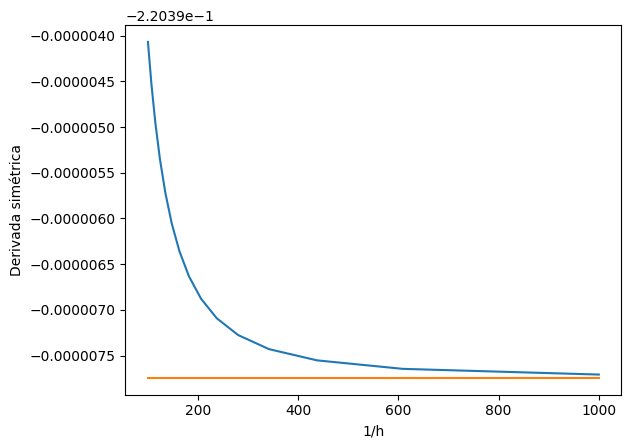

In [139]:
#Se grafica el comportamiento de la derivada simétrica, la recta naranja corresponde al valor exacto de la derivada, gracias a ésta podremos observar la convergencia a dicho valor.
plot(listf,listDS)
plot(listf,Y)
ylabel("Derivada simétrica"); #Se asigna el nombre al eje "x" y al eje "y".
xlabel("1/h");

In [ ]:
#Resulta claro que la derivada simétrica tiene un comportamiento representado por una parábola, esto es debido a que conforme h es más pequela y por lo tanto 1/h aumenta, el valor de la derivada simétrica decae velozmente.

In [131]:
function error_relativo(g,x,h)
    ε=abs((((g(x+h)-g(x-h))/2h)-derivada_exacta4(x))/derivada_exacta4(x))
    return ε
end

error_relativo (generic function with 1 method)

In [133]:
ε=error_relativo.(g,0.2222222222222222,h)

15-element Array{Float64,1}:
 1.66667e-7
 4.4983e-7 
 8.70748e-7
 1.42942e-6
 2.12585e-6
 2.96003e-6
 3.93197e-6
 5.04166e-6
 6.2891e-6 
 7.6743e-6 
 9.19725e-6
 1.0858e-5 
 1.26564e-5
 1.45926e-5
 1.66666e-5

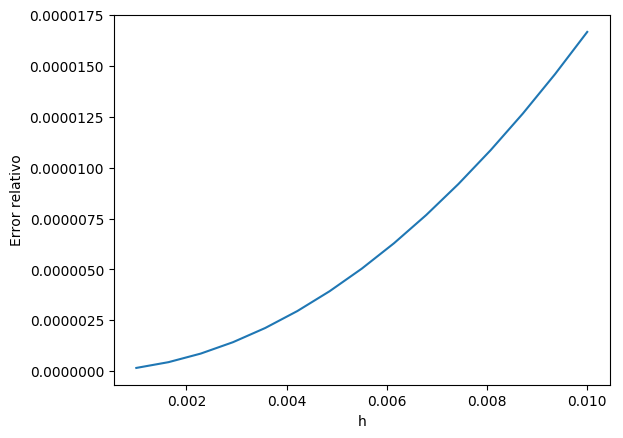

In [140]:
#Se construye la representación gráfica del error relativo vs h.
plot(h,ε)
ylabel("Error relativo");
xlabel("h");

In [ ]:
#De esta representación gráfica se aprecia que conforme h aumenta el error relativo aumenta en una relación no lineal.

# Ejercicio 5

Primero mostremos que $\vartriangle_h:f\rightarrow f(x+h)-f(x)=\vartriangle f(x,h)$ es un operador lineal, es decir: 

$$\vartriangle_h(\alpha_1\phi_1(x)+\alpha_2\phi_2(x))=\vartriangle\alpha_1\phi_1(x,h)+\vartriangle\alpha_2\phi_2(x,h)$$

Entonces: $$\vartriangle_h(\alpha_1\phi_1(x)+\alpha_2\phi_2(x))=\vartriangle_h\alpha_1\phi_1(x)+\vartriangle_h\alpha_2\phi_2(x)$$

Como $\vartriangle f(x)=\vartriangle f(x,h)$ y tomando en cuenta la relación entre ambas, se tiene que:

$$=\vartriangle_h\alpha_1\phi_1(x+h)+\vartriangle_h\alpha_2\phi_2(x+h)- \alpha_1\phi_1(x)-\alpha_2\phi_2(x)$$
$$=\vartriangle\alpha_1\phi_1(x,h)+\vartriangle\alpha_2\phi_2(x,h)$$

$\therefore    \vartriangle_h:f\rightarrow f(x+h)-f(x)=\vartriangle f(x,h)$ es un operador lineal.

De esta manera, si: $$\vartriangle_hf(x)=f(x+h)-f(x)=\left[\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}\right] f(x)$$

Es posible factorizar la función $f(x)$ del operador $\vartriangle_h$:
$$\vartriangle_h=\left[\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}\right]$$


# Ejercicio 6

En este ejercicio tenemos por objetivo identificar cúal es la función evaluada en $\Delta_h\frac{d}{d\xi}\mid_{\xi=x}$. Esto es, la función $\phi$ que cumple la relación: $$\Delta_h=\phi(\frac{d}{d\xi}\mid_{\xi=x})$$

Sabemos que: $$\vartriangle_h=\left[\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}\right]$$

Por lo que: $$\phi(\frac{d}{d\xi}\mid_{\xi=x})=\left[\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}\right]$$

Entonces, operando con la expresión $\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}$, tenemos:

$$\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}=\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}+0$$
$$=\sum_{n=1}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}+(1-1)=\sum_{n=0}^{\infty}\frac{1}{n!}h^n\frac{d^n}{d\xi^n}|_{\xi=x}-1$$
$$=e^{h\frac{d}{d\xi}|{\xi=x}}-1$$

Por lo tanto, se ha demostrado que: $$\phi(x)=e^{h\frac{d}{d\xi}|{\xi=x}}-1$$